# Introduction

The IMDb Top 250 list represents a curated selection of highly acclaimed films that have garnered worldwide recognition. This solo project undertakes an exploratory data analysis (EDA) of the IMDb Top 250 movies from 1996 to 2021. The objective is to uncover patterns and insights that contribute to the enduring brilliance of these cinematic masterpieces.

Using statistical techniques, data visualization, and thorough data exploration, this analysis aims to address key inquiries related to genre dominance, rating trends, director influence, correlations between release years and rankings, as well as the presence of outliers. By doing so, it seeks to enhance our understanding of the art of filmmaking and provide valuable insights into the evolving preferences of audiences over time.


Here are few questions that will be answered throughout the project:

- What is the distribution of movie genres in the IMDb Top 250 dataset? How has it changed throughout the years?
- How does Runtime distribution look like?
- Is there a relationship between the runtime of a movie and its IMDb rating? Which relationships arise in general and how strong are they?
- Who are the most frequently appearing actors or directors in the IMDb Top 250 movies?

**Data Sources**

`imdbTop250.csv` was provided via Kaggle (https://www.kaggle.com/datasets/mustafacicek/imdb-top-250-lists-1996-2020/code)

## Importing modules

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, animation
from sklearn.impute import SimpleImputer
import seaborn as sns
%matplotlib notebook

## Load the data

#### imdbTop250

`imdbTop250.csv` contains information on the different movies which were listed on TOP-250 IMDB rankings from 1996 to 2020

In [2]:
movies = pd.read_csv('imdbTop250.csv')
movies.head

<bound method NDFrame.head of       Ranking  IMDByear            IMDBlink  \
0           1      1996   /title/tt0076759/   
1           2      1996   /title/tt0111161/   
2           3      1996   /title/tt0117951/   
3           4      1996   /title/tt0114814/   
4           5      1996   /title/tt0108598/   
...       ...       ...                 ...   
6495      246      2021   /title/tt0058946/   
6496      247      2021   /title/tt0050783/   
6497      248      2021   /title/tt0093779/   
6498      249      2021   /title/tt7060344/   
6499      250      2021  /title/tt10280296/   

                                   Title  Date  RunTime  \
0     Star Wars: Episode IV - A New Hope  1977      121   
1               The Shawshank Redemption  1994      142   
2                          Trainspotting  1996       93   
3                     The Usual Suspects  1995      106   
4                     The Wrong Trousers  1993       30   
...                                  ...   ...     

## Checking for missing data and cleaning

In [6]:
null_counts = movies.isnull().sum()
print(null_counts)

Ranking       0
IMDByear      0
IMDBlink      0
Title         0
Date          0
RunTime       0
Genre         0
Rating        0
Score       826
Votes         0
Gross       809
Director      0
Cast1         0
Cast2         0
Cast3         8
Cast4         8
dtype: int64


There are some columns where Cast3 and Cast4 info is missing. However, the amount of those is not significant compared to size of dataset, so we can just omit the rows where data is missing

In [8]:
columns_to_drop = ['Cast3', 'Cast4']
movies = movies.dropna(subset=columns_to_drop)
print(movies.isnull().sum())

Ranking       0
IMDByear      0
IMDBlink      0
Title         0
Date          0
RunTime       0
Genre         0
Rating        0
Score       818
Votes         0
Gross       801
Director      0
Cast1         0
Cast2         0
Cast3         0
Cast4         0
dtype: int64


In the dataset, it is observed that there are quite a lot of missing values in the "Score" and "Gross" columns. These missing values could potentially impact the analysis results. Therefore, it is better to perform imputation to fill in the missing values in these columns. By imputing the missing values, we can ensure a more comprehensive and accurate analysis of the dataset.

In [13]:
imputer = SimpleImputer(strategy='median')
#movies[['Gross', 'Score']] = imputer.fit_transform(movies[['Gross', 'Score']]) - variation with excessive copying
columns_to_impute = ['Gross', 'Score']
movies.loc[:, columns_to_impute] = imputer.fit_transform(movies[columns_to_impute])
print(movies.isnull().sum())

Ranking     0
IMDByear    0
IMDBlink    0
Title       0
Date        0
RunTime     0
Genre       0
Rating      0
Score       0
Votes       0
Gross       0
Director    0
Cast1       0
Cast2       0
Cast3       0
Cast4       0
dtype: int64


## Explore the data

The first thing is to find the number of distinct movies in rating 

In [14]:
movies.IMDBlink.nunique()

742

Obviously, there are movies which are included in the list throughout the years. Let's see which movies were included in the top *every* year from 1996 to 2021

In [30]:
table = movies['Title'].value_counts()
print(f'amount of all time favorite movies: {len(table[table==26])}\n')
for i in range(len(table[table==26])):
    print(table.index[i])

amount of all time favorite movies: 78

Star Wars: Episode IV - A New Hope
Cool Hand Luke
Psycho
The Godfather: Part II
Unforgiven
The Third Man
Ben-Hur
The Great Dictator
Alien
Die Hard
Indiana Jones and the Last Crusade
Vertigo
The Silence of the Lambs
On the Waterfront
Taxi Driver
Cinema Paradiso
Once Upon a Time in the West
Star Wars: Episode VI - Return of the Jedi
Goodfellas
Rashomon
Apocalypse Now
North by Northwest
Lawrence of Arabia
Back to the Future
Forrest Gump
To Kill a Mockingbird
Full Metal Jacket
Metropolis
Das Boot
The Seventh Seal
The Sting
Some Like It Hot
Life of Brian
Raging Bull
The Deer Hunter
Chinatown
The Bridge on the River Kwai
Amadeus
Stand by Me
Singin' in the Rain
Gone with the Wind
The Treasure of the Sierra Madre
Once Upon a Time in America
The Shining
Terminator 2: Judgment Day
The Gold Rush
The Great Escape
Ran
12 Angry Men
Modern Times
Reservoir Dogs
Fargo
Pulp Fiction
2001: A Space Odyssey
Casablanca
The Princess Bride
Léon: The Professional
Star War

It would be interesting to see whether there's a relationship between movie being all time favorite and its IMDb ranking

<AxesSubplot:xlabel='all26', ylabel='Ranking'>

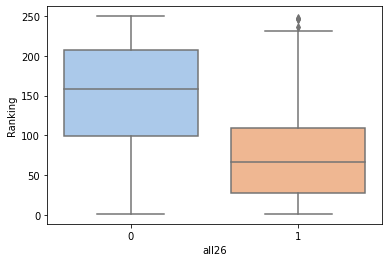

In [39]:
movies.loc[movies['Title'].isin(table[table == 26].index), 'all26'] = 1
movies.loc[~movies['Title'].isin(table[table == 26].index), 'all26'] = 0
sns.boxplot(x='all26', y='Ranking', data=movies, palette='pastel')

Indeed, there is a clear association between these two values. Movies that have consistently ranked in the top 250 across all years tend to have a lower median ranking, around 75. On the other hand, movies that did not make it to the top 250 have a higher median ranking, around 160. This suggests that being an all-time favorite among IMDb users is closely related to achieving a higher ranking in the IMDb Top 250 list.

It would be also interesting to see which movies were top-10 every year and search for some tendency

In [52]:
top10 = lambda year: movies[movies['IMDByear'] == year].sort_values(by='Ranking', ascending=True).head(10)
#for each movie who was in top 10 in any year assign a random color
colors = {title: np.random.rand(3,) for title in movies['Title'].unique()}
def update(year):
    data = top10(year)
    ax.clear()
    ax.barh(data['Title'], data['Rating'], color=[colors[title] for title in data['Title']])
    ax.bar_label(ax.containers[0], fmt='%.1f')
    #reverse the order of the y axis
    ax.invert_yaxis()
    plt.title(f'Top 10 movies of {year} and their rating')
    plt.xlabel('Title')
    plt.ylabel('Ranking')

<IPython.core.display.Javascript object>


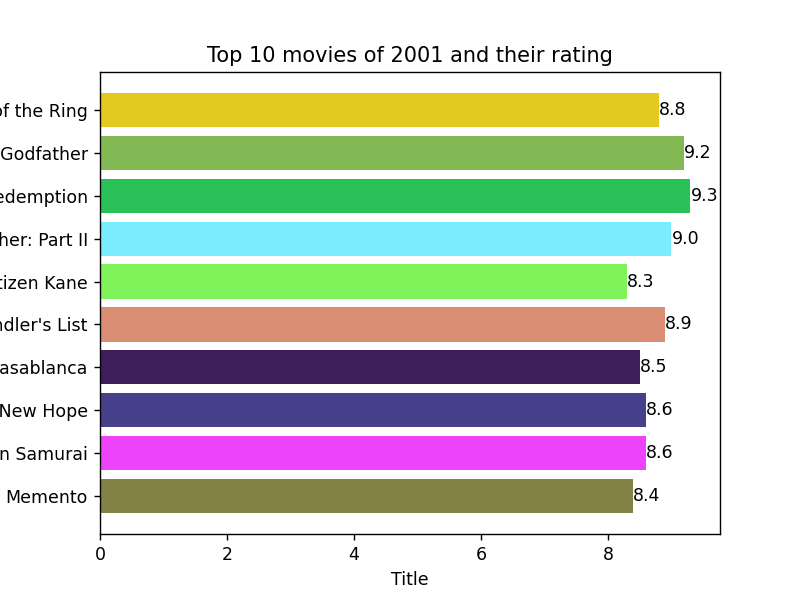

In [53]:
fig, ax = plt.subplots()
animator = animation.FuncAnimation(fig, update, frames=range(1996, 2022), interval=500)
plt.show()